# Q2: suicide detection

In [1]:
import pandas as pd
import numpy as np


In [2]:
import pandas as pd
path = "./twitter-suicidal_data.csv"
df = pd.read_csv(path)
print(df.head())
print(df.columns)
print(df.info())
print(df.iloc[:, 1].unique())

                                               tweet  intention
0  my life is meaningless i just want to end my l...          1
1  muttering i wanna die to myself daily for a fe...          1
2  work slave i really feel like my only purpose ...          1
3  i did something on the 2 of october i overdose...          1
4  i feel like no one cares i just want to die ma...          1
Index(['tweet', 'intention'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9119 entries, 0 to 9118
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      9119 non-null   object
 1   intention  9119 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 142.6+ KB
None
[1 0]


In [3]:
import string

print(string.punctuation)

import pandas as pd

# Sample data
data = {'text': ['apple 123 banana 456', 'cherry 789 date 101']}
df1 = pd.DataFrame(data)

# Use .str.extract() with a regex pattern containing multiple groups
pattern = r'(\w+) (\d+)'
result = df1['text'].str.findall(pattern)

print(result)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
0    [(apple, 123), (banana, 456)]
1     [(cherry, 789), (date, 101)]
Name: text, dtype: object


In [4]:
import re
test_text = " h e _l l_o_w or ld" 
print(re.findall(r'(\s.+?_.+?\s)', test_text))


[' h e _l ']


In [5]:
df[0:1]

,tweet,intention
0,my life is meaningless i just want to end my l...,1


In [6]:
# print all the words in the tweets that has ampersign:
r1 = df[df['tweet'].str.contains("_")]['tweet']
# # show the word contains the ampersign:
print(df['tweet'][256])
print(r1.str.findall(r'(\w+?\s*_)(?=(\s*\w+?\b))'))

i dont belong i am asexual i dont belong minority groups reject me because apparently i dont suffer enough i tried to send a message of empowerment people minimise my struggles i dont belongi amimmaturei am worthless ifi amasexuali ambroken no one wants to be with someone like me something is seriously wrong with me and no one wants to support me i dont belong anywhere i thought i might in the warm hearted community i thought it would be but they hate me because my struggle isnt real i dont belong anywhere theres no place for me in this world
265                           [(know _,  i), (but _,  i)]
898                                     [(through _,  _)]
1096                                         [(to _,  _)]
1175                                                   []
1209                                       [(cant _,  _)]
1277                                          [(do_,  _)]
1289                                  [(parents_,  _she)]
1424                                  [(day _

## 2.1 Pre-Precoessing:


In [8]:
# this is a nlp task, pre-processing the tweets using nltk:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# remove stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
# remove punctuations
punctuations = string.punctuation
# stem the words
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    # Replace punctuation with space
    text = "".join([char if char not in punctuations else " " for char in text])
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    # Stem the words
    text = " ".join([stemmer.stem(word) for word in text.split()])
    return text

df['clean_text'] = df['tweet'].apply(lambda x: clean_text(x))


[nltk_data] Downloading package punkt to /home/sepehr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sepehr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sepehr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sepehr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

temp_words = ["wont", "can't", "don't", "goes","nt", "n't", ]
# Tokenize the words:
temp_tokend = word_tokenize(" ".join(temp_words))
print(temp_tokend)

# lemmitize the words:
lemmatizer = WordNetLemmatizer()
for word in temp_tokend:
    print(lemmatizer.lemmatize(word))
print("-----------------------------")
for word in temp_words:
    print(lemmatizer.lemmatize(word))

[nltk_data] Downloading package punkt to /home/sepehr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sepehr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sepehr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['wont', 'ca', "n't", 'do', "n't", 'goes', 'nt', "n't"]
wont
ca
n't
do
n't
go
nt
n't
-----------------------------
wont
can't
don't
go
nt
n't


In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = ''.join([char if (char.isalpha() or char.isspace()) else " " for char in text])
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)
    return text

df['clean_text2'] = df['tweet'].apply(lambda x: clean_text(x))


[nltk_data] Downloading package punkt to /home/sepehr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/sepehr/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sepehr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
print(df.loc[0,"tweet"], '\n\n\n')
print(df.loc[0,"clean_text"])
print(df.loc[0,"clean_text2"])

my life is meaningless i just want to end my life so badly my life is completely empty and i dont want to have to create meaning in it creating meaning is pain how long will i hold back the urge to run my car head first into the next person coming the opposite way when will i stop feeling jealous of tragic characters like gomer pile for the swift end they were able to bring to their lives 



life meaningless want end life badli life complet empti dont want creat mean creat mean pain long hold back urg run car head first next person come opposit way stop feel jealou tragic charact like gomer pile swift end abl bring live
life meaningless want end life badly life completely empty dont want create meaning creating meaning pain long hold back urge run car head first next person coming opposite way stop feeling jealous tragic character like gomer pile swift end able bring life


In [12]:
# drop column clean_text2 and set it as the clean_text column:
df["clean_text"] = df.pop("clean_text2")
df.columns

Index(['tweet', 'intention', 'clean_text'], dtype='object')

## 2.2 Create embedding matrix

In [13]:
# test
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from nltk.tokenize import word_tokenize
import plotly.graph_objs as go
import pandas as pd
tokens_datset = df['clean_text'].apply(lambda x: word_tokenize(x))
# print the total number of tokens in the dataset:
print(sum([len(tokens) for tokens in tokens_datset]))

341184


['life', 'meaningless', 'want', 'end', 'life', 'badly', 'life', 'completely', 'empty', 'dont']
total number of unique tokens: 21985
[('want', 5297), ('dont', 4592), ('like', 3852), ('feel', 3843), ('life', 3305), ('know', 3281), ('get', 2778), ('time', 2429), ('cant', 2347), ('ive', 2242)]
[('counted', 1), ('muffle', 1), ('clench', 1), ('breake', 1), ('imperfect', 1), ('sugarbowl', 1), ('keala', 1), ('anwer', 1), ('lonley', 1), ('leaven', 1)]
12348


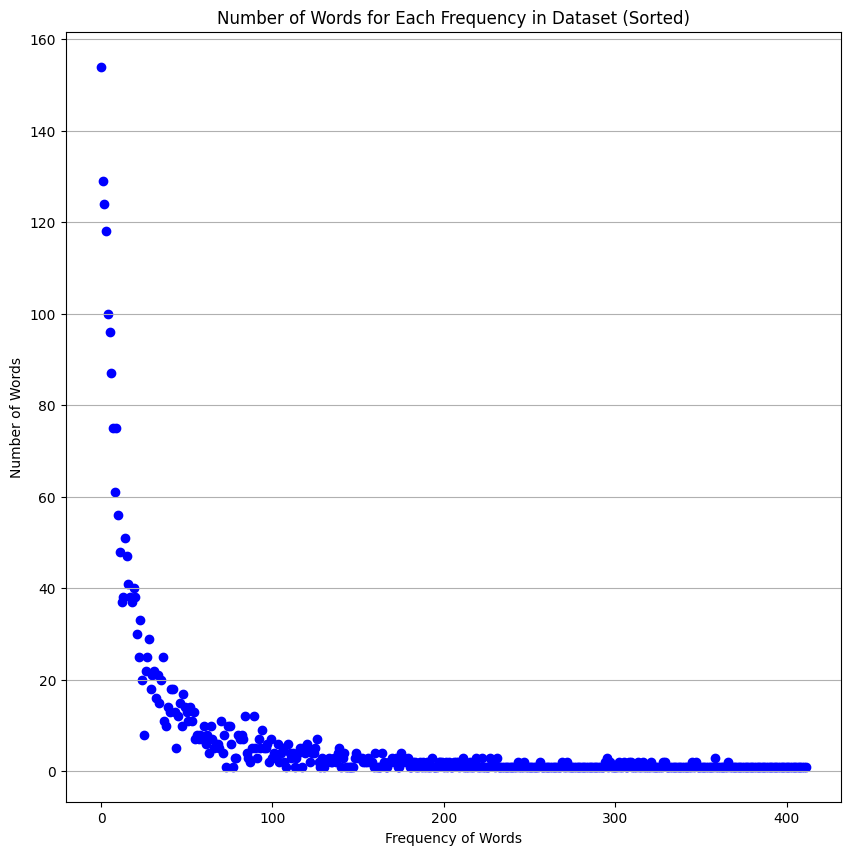

422
[(1, 12348), (2, 2601), (3, 1286), (4, 833), (5, 590), (6, 441), (7, 370), (8, 257), (9, 211), (10, 187), (11, 154), (12, 129), (13, 124), (14, 118), (15, 100), (16, 96), (17, 87), (18, 75), (19, 61), (20, 75), (21, 56), (22, 48), (23, 37), (24, 38), (25, 51), (26, 47), (27, 41), (28, 38), (29, 37), (30, 40), (31, 38), (32, 30), (33, 25), (34, 33), (35, 20), (36, 8), (37, 22), (38, 25), (39, 29), (40, 18), (41, 21), (42, 22), (43, 16), (44, 21), (45, 15), (46, 20), (47, 25), (48, 11), (49, 10), (50, 14), (51, 13), (52, 18), (53, 18), (54, 13), (55, 5), (56, 12), (57, 15), (58, 10), (59, 17), (60, 14), (61, 13), (62, 11), (63, 14), (64, 11), (65, 13), (66, 7), (67, 8), (68, 7), (69, 8), (70, 7), (71, 10), (72, 6), (73, 8), (74, 4), (75, 10), (76, 7), (77, 5), (78, 6), (79, 6), (80, 5), (81, 11), (82, 4), (83, 8), (84, 1), (85, 10), (86, 10), (87, 6), (88, 1), (89, 3), (90, 3), (91, 8), (92, 7), (93, 8), (94, 7), (95, 12), (96, 4), (97, 3), (98, 2), (99, 5), (100, 12), (101, 5), (102

In [14]:
# test
import itertools
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'dataset' is your list of lists, where each sublist is a tokenized tweet
flattened_tokens = list(itertools.chain.from_iterable(tokens_datset))
print(flattened_tokens[0:10])

token_counts = Counter(flattened_tokens)
print("total number of unique tokens:",len(token_counts))
print(token_counts.most_common(10))
print(token_counts.most_common()[:-10-1:-1])
words_with_freq_one = [word for word in token_counts if token_counts[word] == 1]
print(len(words_with_freq_one))
# Count how many words have each frequency
frequency_of_frequencies = Counter(token_counts.values())

sorted_frequencies = sorted(frequency_of_frequencies.keys())
sorted_counts = [frequency_of_frequencies[freq] for freq in sorted_frequencies]

# Plotting with sorted data
plt.figure(figsize=(10,10))
plt.scatter(range(len(sorted_frequencies[10:])), sorted_counts[10:], color='blue')
plt.xlabel('Frequency of Words')
plt.ylabel('Number of Words')
plt.title('Number of Words for Each Frequency in Dataset (Sorted)')
# plt.xticks(sorted_frequencies)
plt.grid(axis='y')
plt.show()
# zip sorted_frequencies and sorted_counts together:
zipped = zip(sorted_frequencies, sorted_counts)
list_zipped = list(zipped)
print(len(list_zipped))
print(list_zipped)


In [15]:
# modifiy the tokens dataset:
tokens_datset = df['clean_text'].apply(lambda x: word_tokenize(x))

temp_index = 0
for i in range(len(tokens_datset)):
    if "amalways" in tokens_datset[i]:
        print(i)
        temp_index = i
        print(tokens_datset[i])
        break
# print(tokens_datset[0])
# replace some tokens with the correct hard-coded correct version:
corrections = {
    'didnt': "didn't",
    'doesnt': "doesn't",
    'amjust': "am just",
    'isnt': "isn't",
    'thati': "that i",
    'likei': "like i",
    'wasnt': "wasn't",
    'nowi': "now i",
    'becausei': "because i",
    'shouldnt': "shouldn't",
    'thinki': "think i",
    'wheni': "when i",
    'whyi': "why i",
    'ifi': "if i",
    'anymorei': "anymore i",
    'lifei': "life i",
    'knowi': "know i",
    'willness': "will ness",  # or "illness" if typo
    'amsick': "am sick",
    'amscared': "am scared",
    'whati': "what i",
    'amafraid': "am afraid",
    'myselfi': "myself i",
    'amdone': "am done",
    'timei': "time i",
    'hasnt': "hasn't",
    'amthe': "am the",
    'thisi': "this i",
    'amgonna': "am gonna",
    'amfeeling': "am feeling",
    'amgetting': "am getting",
    'ampretty': "am pretty",
    'themi': "them i",
    'diei': "die i",
    'amhere': "am here",
    'amonly': "am only",
    'thoughi': "though i",
    'againi': "again i",
    'amstuck': "am stuck",
    'amprobably': "am probably",
    'realise': "realize",
    'amready': "am ready",
    'howi': "how i",
    'amalways': "am always",
    'everytime': "every time",
    'reasoni': "reason i"
}
# calculate the counts/frequency of each token and 
# apply a threshold to remove the tokens with low frequency:
def correct_tokens(tokens):
    corrected_tokens = []
    for token in tokens:
        # if token_counts[token] < 5:
            # continue
            # correct_tokens.append("<UNK>")
        if token in corrections:
            corrected_tokens.extend(corrections[token].split())
        else:
            corrected_tokens.append(token)
        
    return corrected_tokens

clean_tokens_datset = tokens_datset.apply(lambda x: correct_tokens(x))
print(clean_tokens_datset[temp_index])

438
['help', 'nervous', 'break', 'last', 'week', 'almost', 'killed', 'feeling', 'urgency', 'passed', 'feel', 'likei', 'amalways', 'thinking', 'one', 'way', 'another', 'dont', 'know', 'thought']
['help', 'nervous', 'break', 'last', 'week', 'almost', 'killed', 'feeling', 'urgency', 'passed', 'feel', 'like', 'i', 'am', 'always', 'thinking', 'one', 'way', 'another', 'dont', 'know', 'thought']


In [16]:
# create embedding matrix using word2vec in pytorch using local-training:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from nltk.tokenize import word_tokenize
import plotly.graph_objs as go
import pandas as pd

nltk.download('punkt')

# initialize and train word2vec model too becuase of passing the tokens datsets to constructor:
model = Word2Vec(clean_tokens_datset, vector_size=300, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index)
print(len(words))
print((words[:10]))
# access vector for one word
print(len(model.wv['want']))
print(model.wv['want'][:10])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)
print(len(new_model.wv))

[nltk_data] Downloading package punkt to /home/sepehr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Word2Vec<vocab=21963, vector_size=300, alpha=0.025>
21963
['want', 'dont', 'like', 'feel', 'life', 'know', 'get', 'time', 'cant', 'ive']
300
[-0.47851893  0.88940537  0.27225345  0.8576432  -0.5799366  -0.61033136
  0.06678253  1.476435   -0.5421922  -0.4583885 ]
Word2Vec<vocab=21963, vector_size=300, alpha=0.025>
21963


In [17]:
# fit a 2d PCA model to the vectors
X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# # create a scatter plot of the projection
# pyplot.scatter(result[:, 0], result[:, 1])
# for i, word in enumerate(words):
#     pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
# pyplot.show()


# Create a DataFrame for convenience
df1 = pd.DataFrame(result, columns=['x', 'y'])
df1['word'] = words

# Create a scatter plot
fig = go.Figure(data=go.Scatter(x=df1['x'], y=df1['y'], text=df1['word'], mode='markers', hoverinfo='text'))

# Update layout for better readability
fig.update_layout(title='Word Embeddings Visualized with PCA', xaxis_title='PCA Component 1', yaxis_title='PCA Component 2')

# Show the plot
fig.show()



In [18]:
print(model)
# words = list(model.wv.key_to_index)
print(len(words))
print("word", (words[:10]))
print(len(model.wv['suicide']))
print(type(model.wv))
print(result[0][0])
print(result[0][1])

# print(X[0])
print(type(model.wv.key_to_index))
print(list(model.wv.key_to_index.values())[:10])
print(list(model.wv.key_to_index.keys())[:10])

# model.wv.vectors[0]


Word2Vec<vocab=21963, vector_size=300, alpha=0.025>
21963
word ['want', 'dont', 'like', 'feel', 'life', 'know', 'get', 'time', 'cant', 'ive']
300
<class 'gensim.models.keyedvectors.KeyedVectors'>
5.8092623
-3.5796971
<class 'dict'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
['want', 'dont', 'like', 'feel', 'life', 'know', 'get', 'time', 'cant', 'ive']


In [19]:
# load the google pre-trained model and tune our local model for new words:
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

# Load the Google pre-trained model
google_model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300-SLIM.bin', binary=True)

print(model)
local_model = model
# tokens_datset = df['clean_text'].apply(lambda x: word_tokenize(x))
# local_model = Word2Vec(vector_size=300, min_count=1)
# local_model.build_vocab(tokens_datset)

# Transfer Weights for Overlapping Vocabulary
for word in local_model.wv.key_to_index:
    if word in google_model.key_to_index:
        local_model.wv[word] = google_model[word]
        
print(len(tokens_datset), local_model.corpus_count, local_model.epochs)
local_model.train(clean_tokens_datset, total_examples=local_model.corpus_count, epochs=local_model.epochs)
# summarize the loaded model
print(local_model)

# save local_model:
local_model.save('model.bin')

Word2Vec<vocab=21963, vector_size=300, alpha=0.025>
9119 9119 5
Word2Vec<vocab=21963, vector_size=300, alpha=0.025>


In [20]:
print(list(local_model.wv.key_to_index)[:10])
# I guess the matrix is sorted based on the frequency of the words:
google_model.key_to_index['Well']

['want', 'dont', 'like', 'feel', 'life', 'know', 'get', 'time', 'cant', 'ive']


2100

In [21]:
# find the words taht are not in the google pre-trained model:
local_words = [item for item in local_model.wv.key_to_index if item not in google_model.key_to_index] 
print(len(local_words))
# print(len(local_model.wv))
print(local_words[:50])
# print their repective frequency:
local_words_freq = [token_counts[word] for word in local_words]
print(local_words_freq[:50])
zipped = zip(local_words, local_words_freq)
list_zipped = list(zipped)
print(len(list_zipped))
print(list_zipped[:50])

# # scatter plot the frequency of the local words:
# plt.figure(figsize=(10,10))
# plt.scatter(range(len(local_words_freq)), local_words_freq, color='blue')
# plt.ylabel('Number of local Words')
# plt.grid(axis='y')
# plt.show()

# caculate the total number tokens in the local model:
print(sum(local_words_freq[:]))
print(sum(local_words_freq[:50]))

# calculate the frequency of local_words_freq:
local_frequency_of_frequencies = Counter(local_words_freq)
#  print them in sorted order:
sorted_local_frequencies = sorted(local_frequency_of_frequencies.keys())
sorted_local_counts = [local_frequency_of_frequencies[freq] for freq in sorted_local_frequencies]
zipped = zip(sorted_local_frequencies, sorted_local_counts)
list_zipped = list(zipped)
print(len(list_zipped))
print(list_zipped)
# sum:
print(sum([item[1] for item in list_zipped]))


8368
['ptsd', 'reveluvs', 'subreddit', 'ocd', 'amstarting', 'wherei', 'reveluv', 'dayi', 'amhaving', 'yearsi', 'amsure', 'guessi', 'youll', 'amthinking', 'amalso', 'amfucking', 'maybei', 'noone', 'betteri', 'shiti', 'outi', 'amwriting', 'schooli', 'amout', 'amliving', 'helpi', 'amvery', 'tldr', 'sooo', 'anythingi', 'couldve', 'ambeing', 'amnever', 'realised', 'thinksi', 'amabout', 'livei', 'wayi', 'herei', 'amlosing', 'amterrified', 'sayi', 'amdepressed', 'amalone', 'amworried', 'amgood', 'whilei', 'sorryi', 'amcurrently', 'amsupposed']
[46, 46, 38, 37, 31, 31, 30, 30, 29, 29, 29, 29, 28, 28, 28, 28, 28, 28, 27, 27, 27, 26, 26, 26, 26, 25, 25, 25, 24, 23, 23, 23, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20]
8368
[('ptsd', 46), ('reveluvs', 46), ('subreddit', 38), ('ocd', 37), ('amstarting', 31), ('wherei', 31), ('reveluv', 30), ('dayi', 30), ('amhaving', 29), ('yearsi', 29), ('amsure', 29), ('guessi', 29), ('youll', 28), ('amthinking', 28), ('amalso', 28), ('

In [22]:
# test
temp_w = ["didn't", "don't", "can't", "won't", "am"]
print(len(google_model.key_to_index))
result = all(tw in google_model.key_to_index for tw in temp_w)
print(result) 

299567
True


In [23]:
print(type(local_model.wv.index_to_key))

<class 'list'>


In [24]:
if "<PAD>" in local_model.wv.index_to_key:
    print("yes")
else:
    # add the pad index to the end of the local_model:
    local_model.wv.index_to_key.append("<PAD>")
    # update the vector and the key_to_index:
    local_model.wv.vectors = np.append(local_model.wv.vectors, np.zeros((1, 300)), axis=0)
    local_model.wv.key_to_index["<PAD>"] = len(local_model.wv.vectors) - 1


In [25]:
print(len(local_model.wv.index_to_key))
print(len(local_model.wv.key_to_index))
print(local_model.wv.key_to_index["<PAD>"])
print(local_model.wv["<PAD>"][:10])
print(local_model.wv.index_to_key[-1])
# print(local_model.wv.vectors[0])
# print(local_model.wv.index_to_key[0]) 
pad_idx = local_model.wv.key_to_index["<PAD>"]
print(local_model.wv.vectors[pad_idx][:10])

21964
21964
21963
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<PAD>
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [26]:
from torch.nn import Embedding
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
embedding_matrix = torch.tensor(local_model.wv.vectors).to(device)
# Create an embedding layer in PyTorch
embedding_layer = Embedding(num_embeddings=embedding_matrix.size(0), embedding_dim=300).to(device)
# Load the weights into the embedding layer
embedding_layer.load_state_dict({'weight': embedding_matrix})
# Freeze the weights of the embedding layer if you don't want to fine-tune them
embedding_layer.weight.requires_grad = False

print(device)

cuda


In [27]:
labels = df['intention'].values
print(labels.shape)
print(labels[0])
clean_tokens_datset = tokens_datset.apply(lambda x: correct_tokens(x))

(9119,)
1


In [28]:
temp_len = [len(sen) for sen in clean_tokens_datset]
# find the max and min:
print(max(temp_len))
print(min(temp_len))
# drop the rows from clean_token_datset that has the length of the tokens less than 3:
mask = clean_tokens_datset.apply(len) > 3
print(mask.shape)
# Filter the Series
filtered_data = clean_tokens_datset[mask]
temp_len = [len(sen) for sen in filtered_data]
filtered_lables = labels[mask]
# find the max and min:
print(max(temp_len))
print(labels[mask].shape)

2140
0
(9119,)
2140
(7958,)


In [29]:
clean_tokens_datset = filtered_data
labels = filtered_lables
print(labels.shape)
clean_tokens_datset.shape
print(mask.shape)
print(labels.shape)

(7958,)
(9119,)
(7958,)


In [30]:
import pandas as pd
print(embedding_matrix.device)
# test:
print(" ".join(clean_tokens_datset[0]))
indxs = list(pd.Series(clean_tokens_datset[0]).map(lambda x: local_model.wv.key_to_index[x]))
print((indxs))
print(" ".join([local_model.wv.index_to_key[i] for i in indxs]))
res1 = embedding_layer(torch.tensor(indxs).to(device))
print("res1:", res1.shape)

# convert the tokens in the clean_token_datset to their respective index:
index_dataset = clean_tokens_datset.apply(lambda row: [local_model.wv.key_to_index[x] for x in row])
print(index_dataset[0])
print(index_dataset.shape)
print(len(index_dataset[0]))
print(len(index_dataset))
index_dataset = index_dataset.to_numpy()
# index_dataset = torch.tensor(index_dataset).to(device)

print(res1[0][:10])
print(local_model.wv.index_to_key[4])
print(local_model.wv.vectors[4][:10])
print(local_model.vector_size)
# min and max length of the tweets:
print(max([len(sen) for sen in index_dataset]))
print(min([len(sen) for sen in index_dataset]))

cuda:0
life meaningless want end life badly life completely empty dont want create meaning creating meaning pain long hold back urge run car head first next person coming opposite way stop feeling jealous tragic character like gomer pile swift end able bring life
[4, 1363, 0, 38, 4, 723, 4, 309, 440, 1, 0, 2212, 1077, 4280, 1077, 87, 78, 426, 34, 1003, 467, 251, 171, 118, 195, 80, 297, 1827, 31, 111, 60, 1303, 3808, 1271, 2, 21957, 2036, 3511, 38, 151, 474, 4]
life meaningless want end life badly life completely empty dont want create meaning creating meaning pain long hold back urge run car head first next person coming opposite way stop feeling jealous tragic character like gomer pile swift end able bring life
res1: torch.Size([42, 300])
[4, 1363, 0, 38, 4, 723, 4, 309, 440, 1, 0, 2212, 1077, 4280, 1077, 87, 78, 426, 34, 1003, 467, 251, 171, 118, 195, 80, 297, 1827, 31, 111, 60, 1303, 3808, 1271, 2, 21957, 2036, 3511, 38, 151, 474, 4]
(7958,)
42
7958
tensor([-0.8402,  0.4174, -0.5549

In [31]:
# convert each list of index_datset to tensor:
# how to check is an object is tensor or not:
if isinstance(index_dataset[0], torch.Tensor):
    print(index_dataset[0].dtype)
else:
    index_dataset = [torch.tensor(item).to(device) for item in index_dataset]


## 2.3 Train the Deep Models:


In [32]:
# train the following models: LSTM, 2-LAYER LSTM, CNN + 2-LAYER LSTM:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm
from torch.nn.utils.rnn import pad_sequence
from torch.nn.utils.rnn import pack_padded_sequence
from torch.nn.utils.rnn import pad_packed_sequence
import time
import matplotlib.pyplot as plt

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# create dataset class
class TwitterDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        #           list of tokens indexes, label
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)

# Define collate class to use instances of it as collate_fn in data loaders
class MyCollate:
    def __init__(self, pad_idx):
        self.pad_idx = pad_idx

    def __call__(self, batch):
        # print(batch[0][0].shape)
        # print(batch[0][0])
        token_indxs_set = [item[0] for item in batch]
        # keep the length of each tweet:
        lengths = [len(item) for item in token_indxs_set]
        token_indxs_set = pad_sequence(token_indxs_set, batch_first=True,
                                        padding_value=self.pad_idx)
        # using pack_padded_sequence:
        targets = [item[1] for item in batch]
        targets = torch.tensor(targets)
        return token_indxs_set, targets , lengths
        
# create model class: LSTM
class LSTM(nn.Module):
    def __init__(self, embedding_dim, hidden_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.classifier = nn.Sequential( nn.Linear(self.hidden_dim, 128)
                                       ,nn.ReLU()
                                        ,nn.Linear(128, 32)
                                        ,nn.ReLU()
                                        ,nn.Linear(32, 1))
        # self.dropout = nn.Dropout(dropout)
        # sigmoid:
        self.sigmoid = nn.Sigmoid()

    def forward(self, text):
        # text = [batch size, sent len]
        # embedded = self.dropout(self.embedding(text))

        # embedded = [batch size, sent len, emb dim]
        output, _ = self.lstm(text)
        output , output_lengths = pad_packed_sequence(output, batch_first=True)
        last_outputs = torch.stack([output[i, length - 1] for i, length
                                     in enumerate(output_lengths)])
        # output = [batch size, sent len, hid dim * num directions]
        # hidden/cell = [num layers * num directions, batch size, hid dim]
        x = self.classifier(last_outputs)
        x = self.sigmoid(x)
        return x

# create model class: 2-LAYER LSTM
class LSTM2(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, dropout=0.1):
        super(LSTM2, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=2, batch_first=True)
        self.classifier = nn.Sequential( nn.Linear(self.hidden_dim, 128)
                                       ,nn.ReLU()
                                        ,nn.Linear(128, 32)
                                        ,nn.ReLU()
                                        ,nn.Linear(32, 1))
        self.dropout = nn.Dropout(dropout)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, text):
        # text = [batch size, sent len]
        # embedded = [batch size, sent len, emb dim]
        output, _ = self.lstm(text)
        output , output_lengths = pad_packed_sequence(output, batch_first=True)
        last_outputs = torch.stack([output[i, length - 1] for i, length
                                     in enumerate(output_lengths)])
        # output = [batch size, sent len, hid dim * num directions]
        # hidden/cell = [num layers * num directions, batch size, hid dim]
        x = self.classifier(last_outputs)
        x = self.sigmoid(x)
        return x

# create model class: CNN + 2-LAYER LSTM
class CNN_LSTM(nn.Module):
    def __init__(self, embedding_dim=300, n_filters=64, kernel_size=3, 
                 hidden_dims=[100,50], output_dim=1, dropout=0.5,max_pool_window_size=2):
        super(CNN_LSTM, self).__init__()
        # # Calculate 'same' padding for a stride of 1
        # padding = (kernel_size - 1) // 2
        self.conv = nn.Conv1d(in_channels=embedding_dim, 
                              out_channels=n_filters, 
                              kernel_size=kernel_size,
                              padding="same")
        self.max_pool = nn.MaxPool1d(kernel_size=max_pool_window_size)
        self.dropout = nn.Dropout(dropout)
        self.lstm1 = nn.LSTM(n_filters//2, hidden_dims[0], batch_first=True)
        # self.lstm1.flatten_parameters()
        self.lstm2 = nn.LSTM(hidden_dims[0], hidden_dims[1], batch_first=True)
        # self.lstm2.flatten_parameters()
        self.fc = nn.Linear(hidden_dims[1], output_dim)
        
    def forward(self, text, lengths):
        # text = [batch size, sent len, emb_dim]
        # Change shape to (batch_size, embedding_dim, sequence_length)
        text = text.permute(0, 2, 1)
        conved = F.relu(self.conv(text))
        # Change shape to (batch_size, sequence_length, num_filters
        conved = conved.permute(0, 2, 1)  
        # print(conved.shape)
        pooled = self.max_pool(conved)
        # print(pooled.shape)
        # flattened = pooled.contiguous().view(pooled.size(0), -1)
        dropped = self.dropout(pooled)
        # print(dropped.shape)
        lstm1_out, (hidden1, cell1) = self.lstm1(dropped)
        lstm2_out, (hidden2, cell2) = self.lstm2(lstm1_out)
        # out = [batch size, sent len, hid dim * num directions]
        # We take the last LSTM output for classification
        final_feature_map = torch.stack([lstm2_out[i, length - 1] for i, length
                                         in enumerate(lengths)])
        final_out = self.fc(final_feature_map)
        # sigmoid
        return nn.Sigmoid()(final_out)


cuda


In [33]:
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

# class SuicidalIdeationClassifier(nn.Module):
#     def __init__(self, embedding_dim=300, n_filters=64, kernel_size=3, 
#                  hidden_dims=[100,50], output_dim=2, dropout=0.5,max_pool_window_size=2):
#         super(SuicidalIdeationClassifier, self).__init__()
#         # # Calculate 'same' padding for a stride of 1
#         # padding = (kernel_size - 1) // 2
#         self.conv = nn.Conv1d(in_channels=embedding_dim, 
#                               out_channels=n_filters, 
#                               kernel_size=kernel_size,
#                               padding="same")
#         self.max_pool = nn.MaxPool1d(kernel_size=max_pool_window_size)
#         self.dropout = nn.Dropout(dropout)
#         self.lstm1 = nn.LSTM(n_filters, hidden_dims[0], batch_first=True)
#         self.lstm2 = nn.LSTM(hidden_dims[0], hidden_dims[1], batch_first=True)
#         self.fc = nn.Linear(hidden_dims[1], output_dim)
        
#     def forward(self, text, lengths):
#         # text = [batch size, sent len, emb_dim]
#         # Change shape to (batch_size, embedding_dim, sequence_length)
#         text = text.permute(0, 2, 1)
#         conved = F.relu(self.conv(text))
#         # Change shape to (batch_size, sequence_length, num_filters)
#         conved = conved.permute(0, 2, 1)  
#         pooled = self.max_pool(conved)
#         # flattened = pooled.contiguous().view(pooled.size(0), -1)
#         dropped = self.dropout(pooled)
#         lstm1_out, (hidden1, cell1) = self.lstm1(dropped)
#         lstm2_out, (hidden2, cell2) = self.lstm2(lstm1_out)
#         # out = [batch size, sent len, hid dim * num directions]
#         # We take the last LSTM output for classification
#         final_feature_map = torch.stack([lstm2_out[i, length - 1] for i, length
#                                          in enumerate(lengths)])
#         final_out = self.fc(final_feature_map)
#         return final_out

# # Instantiate the model with the specified hyperparameters
# model3 = SuicidalIdeationClassifier(
#     embedding_dim=300,  # as per the provided hyperparameters
#     n_filters=64,  # number of filters in the Conv1D layer
#     kernel_size=3,  # kernel size for the Conv1D layer
#     hidden_dims=[100,50],  # LSTM hidden dimensionality
#     output_dim=2,  # output dimension for binary classification
#     dropout=0.5,  # dropout rate
# )

In [34]:
# trian the models:
# set hyperparameters
size_of_vocab = len(local_model.wv)
embedding_dim = (local_model.vector_size)
print(embedding_dim)
num_hidden_nodes = 128
num_layers = 2
bidirection = True
dropout = 0.2
kernel_size = 3
n_filters = 100
lr = 1e-3
batch_size = 64
test_batch_size = 64
num_epochs = 10
cnn_num_epochs = 20

# create instance of dataset class
# label is 1d and the index_dataset is 2d
X_train, X_test, y_train, y_test = train_test_split(index_dataset, labels,
                                                     test_size=0.2, random_state=42)
train_dataset = TwitterDataset(X_train, y_train)
test_dataset = TwitterDataset(X_test, y_test)

# create data loaders
train_loader = DataLoader(dataset=train_dataset,collate_fn= MyCollate(pad_idx),
                           batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, collate_fn=MyCollate(pad_idx),
                         batch_size=test_batch_size, shuffle=True)

# initialize the models
model = LSTM(embedding_dim, num_hidden_nodes)
model2 = LSTM2(embedding_dim, num_hidden_nodes)
model3 = CNN_LSTM()

# define optimizer and loss
optimizer = optim.Adam(model.parameters(), lr=lr)
# use binaary classificaiton loss:
criterion = nn.BCELoss()
optimizer2 = optim.Adam(model2.parameters(), lr=lr)
criterion2 = nn.BCELoss()
optimizer3 = optim.Adam(model3.parameters(), lr=lr)
criterion3 = nn.BCELoss()

# push to cuda if available
model = model.to(device)
model2 = model2.to(device)
model3 = model3.to(device)
criterion = criterion.to(device)
criterion2 = criterion2.to(device)
criterion3 = criterion3.to(device)

# train the models
def binary_accuracy(preds, y):
    rounded_preds = torch.round((preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

def train(model, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.train()
    for idx, batch in tqdm(enumerate(iterator), total=len(iterator)):
        optimizer.zero_grad()
        text = batch[0].to(device)
        labels = batch[1].to(torch.float32).to(device)
        lengths = batch[2]
        # print(lengths)
        # packed_padd":
        # dimention of text: [batch size, sent len]
        text = embedding_layer(text)
        # print(text.shape)
        if isinstance(model, CNN_LSTM):
            pass
        else:
            text = pack_padded_sequence(text, lengths, batch_first=True, 
                                        enforce_sorted=False)
        
        # dimention of embedded: [batch size, sent len, emb dim]
        if isinstance(model, CNN_LSTM):
            predictions = model(text, lengths)
        else:
            predictions = model(text)
        predictions = predictions.squeeze(1)
        # print(predictions.dtype)
        # print(predictions.shape)
        loss = criterion(predictions, labels)
        acc = binary_accuracy(predictions, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate(model, iterator, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for batch in iterator:
            text = batch[0].to(device)
            labels = batch[1].to(torch.float32).to(device)
            lengths = batch[2]
            text = embedding_layer(text)
            # print(text.shape)
            if isinstance(model, CNN_LSTM):
                pass
            else:
                text = pack_padded_sequence(text, lengths, batch_first=True, enforce_sorted=False)
            # dimention of embedded: [batch size, sent len, emb dim]
            if isinstance(model, CNN_LSTM):
                predictions = model(text, lengths)
            else:
                predictions = model(text)
            predictions = predictions.squeeze(1)

            loss = criterion(predictions, labels)
            acc = binary_accuracy(predictions, labels)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)


300


In [35]:
# train the models
# LSTM
start_time = time.time()
loss_list = []
acc_list = []
val_loss_list = []
val_acc_list = []
for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    print("train_loss:", train_loss) 
    valid_loss, valid_acc = evaluate(model, test_loader, criterion)
    loss_list.append(train_loss)
    acc_list.append(train_acc)
    val_loss_list.append(valid_loss)
    val_acc_list.append(valid_acc)
    print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc*100:.2f}%, Val. Loss: {valid_loss:3f}, Val. Acc: {valid_acc*100:.2f}%')

end_time = time.time()
print(f'Total training time: {end_time - start_time}s')


100%|██████████| 100/100 [00:14<00:00,  7.10it/s]


train_loss: 0.3808263210952282
Epoch: 01, Train Loss: 0.381, Train Acc: 81.62%, Val. Loss: 0.267672, Val. Acc: 89.10%


100%|██████████| 100/100 [00:13<00:00,  7.21it/s]


train_loss: 0.2171166642010212
Epoch: 02, Train Loss: 0.217, Train Acc: 91.34%, Val. Loss: 0.245338, Val. Acc: 88.96%


100%|██████████| 100/100 [00:13<00:00,  7.32it/s]


train_loss: 0.20094430677592753
Epoch: 03, Train Loss: 0.201, Train Acc: 91.90%, Val. Loss: 0.210629, Val. Acc: 91.27%


100%|██████████| 100/100 [00:13<00:00,  7.30it/s]


train_loss: 0.1749265770614147
Epoch: 04, Train Loss: 0.175, Train Acc: 92.90%, Val. Loss: 0.216291, Val. Acc: 91.34%


100%|██████████| 100/100 [00:13<00:00,  7.27it/s]


train_loss: 0.16630947411060334
Epoch: 05, Train Loss: 0.166, Train Acc: 93.40%, Val. Loss: 0.204669, Val. Acc: 92.04%


100%|██████████| 100/100 [00:13<00:00,  7.23it/s]


train_loss: 0.14208526324480772
Epoch: 06, Train Loss: 0.142, Train Acc: 94.14%, Val. Loss: 0.203467, Val. Acc: 92.46%


100%|██████████| 100/100 [00:14<00:00,  7.05it/s]


train_loss: 0.12439254809170962
Epoch: 07, Train Loss: 0.124, Train Acc: 95.08%, Val. Loss: 0.192820, Val. Acc: 92.67%


100%|██████████| 100/100 [00:13<00:00,  7.21it/s]


train_loss: 0.11639294855296611
Epoch: 08, Train Loss: 0.116, Train Acc: 95.42%, Val. Loss: 0.226516, Val. Acc: 91.65%


100%|██████████| 100/100 [00:13<00:00,  7.18it/s]


train_loss: 0.10329423336312175
Epoch: 09, Train Loss: 0.103, Train Acc: 96.15%, Val. Loss: 0.201532, Val. Acc: 92.90%


100%|██████████| 100/100 [00:13<00:00,  7.37it/s]


train_loss: 0.09006756560876966
Epoch: 10, Train Loss: 0.090, Train Acc: 96.61%, Val. Loss: 0.241807, Val. Acc: 92.46%
Total training time: 144.05111622810364s


In [36]:

# LSTM2
start_time = time.time()
loss_list2 = []
acc_list2 = []
val_loss_list2 = []
val_acc_list2 = []
for epoch in range(num_epochs):
    train_loss, train_acc = train(model2, train_loader, optimizer2, criterion2)
    valid_loss, valid_acc = evaluate(model2, test_loader, criterion2)
    loss_list2.append(train_loss)
    acc_list2.append(train_acc)
    val_loss_list2.append(valid_loss)
    val_acc_list2.append(valid_acc)
    print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc*100:.2f}%, Val. Loss: {valid_loss:3f}, Val. Acc: {valid_acc*100:.2f}%')
    

100%|██████████| 100/100 [00:16<00:00,  5.95it/s]


Epoch: 01, Train Loss: 0.348, Train Acc: 84.75%, Val. Loss: 0.255895, Val. Acc: 88.85%


100%|██████████| 100/100 [00:16<00:00,  5.92it/s]


Epoch: 02, Train Loss: 0.229, Train Acc: 90.61%, Val. Loss: 0.223276, Val. Acc: 91.06%


100%|██████████| 100/100 [00:16<00:00,  5.91it/s]


Epoch: 03, Train Loss: 0.201, Train Acc: 92.35%, Val. Loss: 0.218803, Val. Acc: 91.38%


100%|██████████| 100/100 [00:16<00:00,  6.08it/s]


Epoch: 04, Train Loss: 0.178, Train Acc: 92.87%, Val. Loss: 0.199719, Val. Acc: 91.77%


100%|██████████| 100/100 [00:16<00:00,  5.98it/s]


Epoch: 05, Train Loss: 0.176, Train Acc: 93.06%, Val. Loss: 0.210152, Val. Acc: 91.92%


100%|██████████| 100/100 [00:16<00:00,  6.03it/s]


Epoch: 06, Train Loss: 0.144, Train Acc: 94.39%, Val. Loss: 0.207227, Val. Acc: 90.88%


100%|██████████| 100/100 [00:16<00:00,  5.99it/s]


Epoch: 07, Train Loss: 0.142, Train Acc: 94.40%, Val. Loss: 0.197659, Val. Acc: 92.65%


100%|██████████| 100/100 [00:16<00:00,  5.94it/s]


Epoch: 08, Train Loss: 0.122, Train Acc: 95.29%, Val. Loss: 0.223333, Val. Acc: 91.38%


100%|██████████| 100/100 [00:16<00:00,  6.15it/s]


Epoch: 09, Train Loss: 0.109, Train Acc: 95.76%, Val. Loss: 0.202109, Val. Acc: 92.46%


100%|██████████| 100/100 [00:17<00:00,  5.85it/s]


Epoch: 10, Train Loss: 0.095, Train Acc: 96.37%, Val. Loss: 0.218448, Val. Acc: 91.64%


In [37]:
# save the models:
torch.save(model.state_dict(), 'model.pt')
torch.save(model2.state_dict(), 'model2.pt')


In [38]:
# empty gpu cache:
del model, model2
torch.cuda.empty_cache()

In [39]:
# CNN_LSTM
start_time = time.time()
loss_list3 = []
acc_list3 = []
val_loss_list3 = []
val_acc_list3 = []
for epoch in range(cnn_num_epochs):
    train_loss, train_acc = train(model3, train_loader, optimizer3, criterion3)
    valid_loss, valid_acc = evaluate(model3, test_loader, criterion3)
    loss_list3.append(train_loss)
    acc_list3.append(train_acc)
    val_loss_list3.append(valid_loss)
    val_acc_list3.append(valid_acc)
    print(f'Epoch: {epoch+1:02}, Train Loss: {train_loss:.3f}, Train Acc: {train_acc*100:.2f}%, Val. Loss: {valid_loss:3f}, Val. Acc: {valid_acc*100:.2f}%')


100%|██████████| 100/100 [00:13<00:00,  7.55it/s]


Epoch: 01, Train Loss: 0.373, Train Acc: 84.56%, Val. Loss: 0.258683, Val. Acc: 89.93%


100%|██████████| 100/100 [00:13<00:00,  7.35it/s]


Epoch: 02, Train Loss: 0.245, Train Acc: 90.59%, Val. Loss: 0.252355, Val. Acc: 89.06%


100%|██████████| 100/100 [00:13<00:00,  7.61it/s]


Epoch: 03, Train Loss: 0.218, Train Acc: 91.62%, Val. Loss: 0.222153, Val. Acc: 91.31%


100%|██████████| 100/100 [00:13<00:00,  7.38it/s]


Epoch: 04, Train Loss: 0.204, Train Acc: 92.11%, Val. Loss: 0.210352, Val. Acc: 91.85%


100%|██████████| 100/100 [00:13<00:00,  7.15it/s]


Epoch: 05, Train Loss: 0.198, Train Acc: 91.92%, Val. Loss: 0.204525, Val. Acc: 92.18%


100%|██████████| 100/100 [00:13<00:00,  7.47it/s]


Epoch: 06, Train Loss: 0.182, Train Acc: 93.14%, Val. Loss: 0.207471, Val. Acc: 91.63%


100%|██████████| 100/100 [00:13<00:00,  7.35it/s]


Epoch: 07, Train Loss: 0.176, Train Acc: 92.84%, Val. Loss: 0.216691, Val. Acc: 91.52%


100%|██████████| 100/100 [00:13<00:00,  7.45it/s]


Epoch: 08, Train Loss: 0.163, Train Acc: 93.66%, Val. Loss: 0.209167, Val. Acc: 92.60%


100%|██████████| 100/100 [00:13<00:00,  7.19it/s]


Epoch: 09, Train Loss: 0.158, Train Acc: 94.04%, Val. Loss: 0.217443, Val. Acc: 90.87%


100%|██████████| 100/100 [00:13<00:00,  7.46it/s]


Epoch: 10, Train Loss: 0.149, Train Acc: 94.11%, Val. Loss: 0.197322, Val. Acc: 92.89%


100%|██████████| 100/100 [00:13<00:00,  7.57it/s]


Epoch: 11, Train Loss: 0.149, Train Acc: 94.28%, Val. Loss: 0.191528, Val. Acc: 92.45%


100%|██████████| 100/100 [00:13<00:00,  7.21it/s]


Epoch: 12, Train Loss: 0.142, Train Acc: 94.43%, Val. Loss: 0.184735, Val. Acc: 92.83%


100%|██████████| 100/100 [00:13<00:00,  7.34it/s]


Epoch: 13, Train Loss: 0.136, Train Acc: 94.94%, Val. Loss: 0.205873, Val. Acc: 92.46%


100%|██████████| 100/100 [00:13<00:00,  7.22it/s]


Epoch: 14, Train Loss: 0.126, Train Acc: 95.22%, Val. Loss: 0.196630, Val. Acc: 92.76%


100%|██████████| 100/100 [00:14<00:00,  7.13it/s]


Epoch: 15, Train Loss: 0.127, Train Acc: 95.30%, Val. Loss: 0.196918, Val. Acc: 92.91%


100%|██████████| 100/100 [00:13<00:00,  7.35it/s]


Epoch: 16, Train Loss: 0.112, Train Acc: 95.87%, Val. Loss: 0.198572, Val. Acc: 93.17%


100%|██████████| 100/100 [00:13<00:00,  7.43it/s]


Epoch: 17, Train Loss: 0.109, Train Acc: 96.00%, Val. Loss: 0.235111, Val. Acc: 92.02%


100%|██████████| 100/100 [00:13<00:00,  7.27it/s]


Epoch: 18, Train Loss: 0.112, Train Acc: 95.92%, Val. Loss: 0.199714, Val. Acc: 93.22%


100%|██████████| 100/100 [00:13<00:00,  7.21it/s]


Epoch: 19, Train Loss: 0.099, Train Acc: 96.42%, Val. Loss: 0.212140, Val. Acc: 92.96%


100%|██████████| 100/100 [00:13<00:00,  7.47it/s]


Epoch: 20, Train Loss: 0.100, Train Acc: 96.26%, Val. Loss: 0.207492, Val. Acc: 93.29%


## 2.4 COMPARE RESULTS

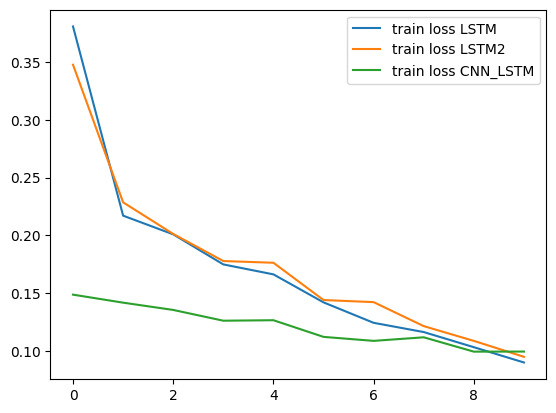

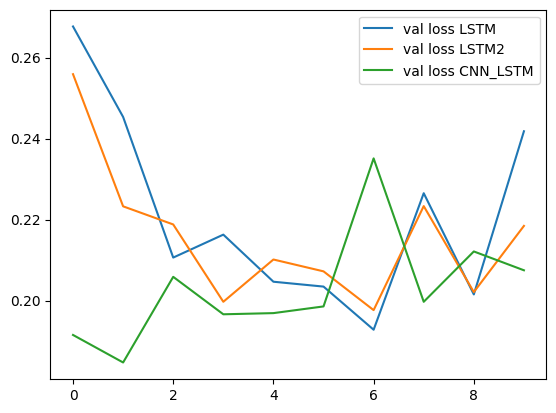

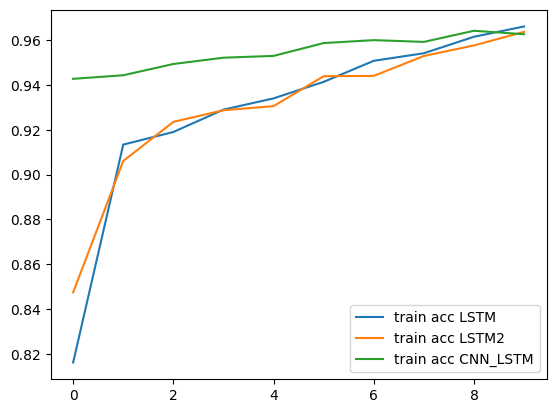

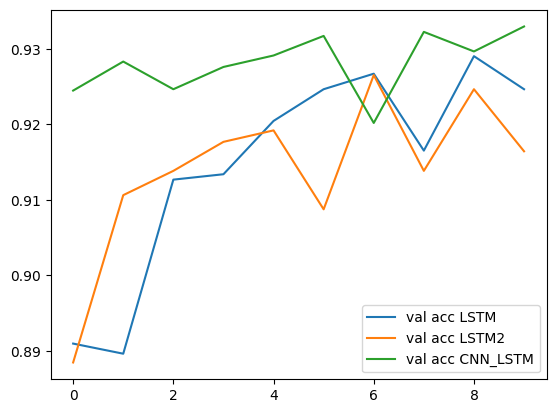

In [42]:
# plot the training and validation loss
plt.plot(loss_list, label='train loss LSTM')
plt.plot(loss_list2, label='train loss LSTM2')
plt.plot(loss_list3[10:], label='train loss CNN_LSTM')
plt.legend()
plt.show()

plt.plot(val_loss_list, label='val loss LSTM')
plt.plot(val_loss_list2, label='val loss LSTM2')
plt.plot(val_loss_list3[10:], label='val loss CNN_LSTM')
plt.legend()
plt.show()

# plot the training and validation accuracy
plt.plot(acc_list, label='train acc LSTM')
plt.plot(acc_list2, label='train acc LSTM2')
plt.plot(acc_list3[10:], label='train acc CNN_LSTM')
plt.legend()
plt.show()

plt.plot(val_acc_list, label='val acc LSTM')
plt.plot(val_acc_list2, label='val acc LSTM2')
plt.plot(val_acc_list3[10:], label='val acc CNN_LSTM')
plt.legend()
plt.show()
